In [4]:
import sys
import os

# Add the scripts/ folder to the Python path
sys.path.append(os.path.abspath("scripts"))

In [5]:
import joblib
from scripts.split_data import load_split_data
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

In [6]:
model_path = "models/logreg_pipeline_20250404_02&M31.joblib"
logreg_model = joblib.load(model_path)

In [8]:
_, X_test, _, y_test = load_split_data("data/raw/Bank Customer Churn Prediction.csv")

In [9]:
#Predicted class labels
y_pred = logreg_model.predict(X_test)

#Predicted probabilities 
y_prob = logreg_model.predict_proba(X_test)[:,1]

#### Classification Report and Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      1593
           1       0.39      0.67      0.49       407

    accuracy                           0.72      2000
   macro avg       0.64      0.70      0.65      2000
weighted avg       0.79      0.72      0.74      2000

Confusion Matrix


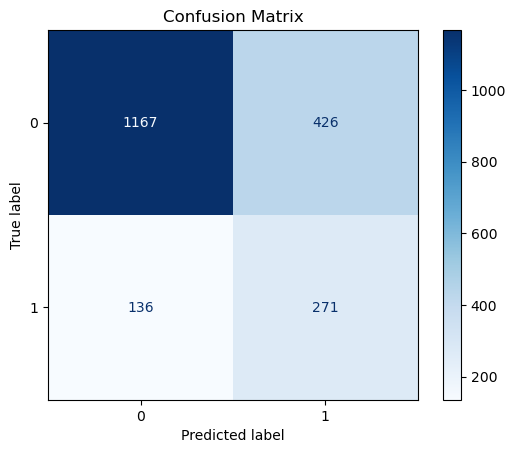

In [10]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix")
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
plt.title("Confusion Matrix")
save_fig("eval-log-reg-confussion-matrix","evaluation")
plt.show()

#### ROC Curve and AUC

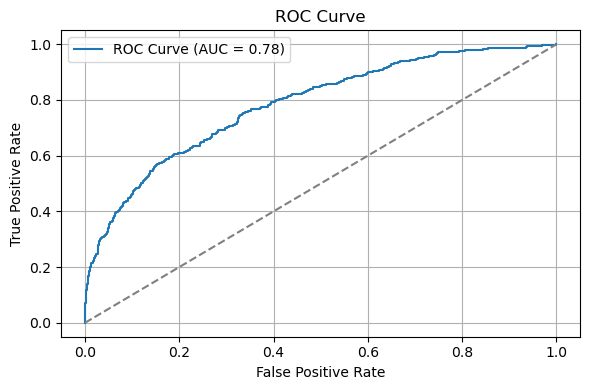

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
save_fig("eval-log-reg-ROC-AUC","evaluation")
plt.show()

#### Precision-Recall Curve

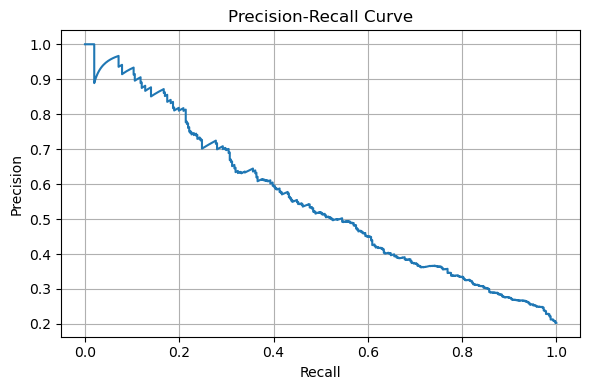

In [12]:
precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="PR Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.tight_layout()
save_fig("eval-log-reg-precision-recall-curve","evaluation")
plt.show()

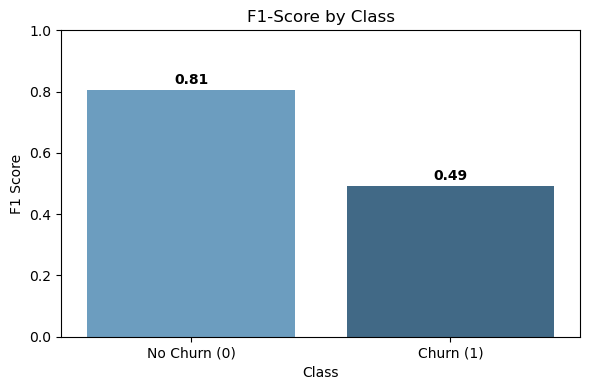

In [16]:
report = classification_report(y_test, y_pred, output_dict=True)

f1_scores = {
    "No Churn (0)": report["0"]["f1-score"],
    "Churn (1)": report["1"]["f1-score"]
}

plt.figure(figsize=(6, 4))
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), palette="Blues_d")
plt.title("F1-Score by Class")
plt.ylim(0, 1)
plt.ylabel("F1 Score")
plt.xlabel("Class")
for i, v in enumerate(f1_scores.values()):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.tight_layout()
save_fig("eval-log-reg-f1-score-by-class","evaluation")
plt.show()